# Requirements





In [1]:
!pip install torch==2.1.1

In [2]:
! pip install accelerate==0.26.1 ipython==8.18.1 ipywidgets==8.1.2 numpy==1.23.5 Pillow==9.4.0 quanto==0.0.11 transformers==4.35.0 sentencepiece==0.2.0

In [8]:
import torch

## Integers

In [9]:
# Information of `8-bit unsigned integer`
torch.iinfo(torch.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [10]:
### Information of `16-bit (signed) integer`
torch.iinfo(torch.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [11]:
### Information of `32-bit (signed) integer`
torch.iinfo(torch.int32)

iinfo(min=-2.14748e+09, max=2.14748e+09, dtype=int32)

In [12]:
### Information of `64-bit (signed) integer`
torch.iinfo(torch.int64)

iinfo(min=-9.22337e+18, max=9.22337e+18, dtype=int64)

## Floating Points

In [13]:
# by default, python stores float data in fp64
value = 1/3
print(format(value, '.60f'))

0.333333333333333314829616256247390992939472198486328125000000


In [14]:
# 64-bit floating point
tensor_fp64 = torch.tensor(value, dtype = torch.float64)
print(f"fp64 tensor: {format(tensor_fp64.item(), '.60f')}")

fp64 tensor: 0.333333333333333314829616256247390992939472198486328125000000


In [15]:
tensor_fp32 = torch.tensor(value, dtype = torch.float32)
tensor_fp16 = torch.tensor(value, dtype = torch.float16)
tensor_bf16 = torch.tensor(value, dtype = torch.bfloat16)
print(f"fp32 tensor: {format(tensor_fp32.item(), '.60f')}")
print(f"fp16 tensor: {format(tensor_fp16.item(), '.60f')}")
print(f"bf16 tensor: {format(tensor_bf16.item(), '.60f')}")

fp32 tensor: 0.333333343267440795898437500000000000000000000000000000000000
fp16 tensor: 0.333251953125000000000000000000000000000000000000000000000000
bf16 tensor: 0.333984375000000000000000000000000000000000000000000000000000


In [16]:
# Information of `16-bit,32-bit 64-bit brain floating point`
print(torch.finfo(torch.bfloat16))
print(torch.finfo(torch.float32))
print(torch.finfo(torch.float64))

finfo(resolution=0.01, min=-3.38953e+38, max=3.38953e+38, eps=0.0078125, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=bfloat16)
finfo(resolution=1e-06, min=-3.40282e+38, max=3.40282e+38, eps=1.19209e-07, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=float32)
finfo(resolution=1e-15, min=-1.79769e+308, max=1.79769e+308, eps=2.22045e-16, smallest_normal=2.22507e-308, tiny=2.22507e-308, dtype=float64)


## Downcasting

In [17]:
# random pytorch tensor: float32, size=1000
tensor_fp32 = torch.rand(1000, dtype = torch.float32)
print(tensor_fp32)

tensor([8.8880e-01, 5.0725e-01, 5.6438e-01, 9.4530e-01, 7.2473e-01, 4.3781e-01,
        5.0960e-01, 9.5271e-01, 1.6763e-01, 5.5023e-01, 9.2404e-01, 4.3092e-01,
        4.4894e-01, 7.2407e-01, 4.7399e-01, 7.0723e-01, 4.5468e-01, 2.9113e-01,
        9.8318e-01, 2.9856e-01, 3.1857e-01, 4.7056e-01, 9.5882e-01, 2.1513e-01,
        8.8876e-01, 8.9052e-01, 3.0770e-01, 7.6350e-01, 6.8791e-01, 2.3486e-01,
        6.6556e-01, 6.8301e-02, 4.2075e-01, 4.8465e-02, 4.8266e-01, 6.4449e-01,
        7.3237e-01, 6.2528e-01, 8.1232e-01, 3.9504e-01, 1.9638e-01, 6.1285e-01,
        3.1207e-01, 6.8046e-01, 5.6933e-01, 2.7185e-01, 6.4967e-01, 8.0773e-01,
        3.6242e-01, 5.0800e-01, 5.9472e-01, 9.5322e-02, 3.6293e-01, 2.8433e-01,
        1.0616e-01, 9.5063e-01, 8.6884e-01, 5.7609e-02, 3.9782e-01, 6.9615e-01,
        8.5848e-01, 1.5847e-01, 1.0222e-01, 4.6575e-01, 8.2627e-01, 7.7329e-01,
        6.1735e-01, 8.9376e-01, 5.0005e-01, 7.1754e-01, 8.0556e-01, 5.1112e-02,
        3.7723e-01, 6.0812e-01, 2.3622e-

In [18]:
# first 10 elements of the random tensor
tensor_fp32[:10]

tensor([0.8888, 0.5073, 0.5644, 0.9453, 0.7247, 0.4378, 0.5096, 0.9527, 0.1676,
        0.5502])

In [19]:
# downcast the tensor to bfloat16 using the "to" method
tensor_fp32_to_bf16 = tensor_fp32.to(dtype = torch.bfloat16)

# printing first 10 elements
tensor_fp32_to_bf16[:10]


tensor([0.8906, 0.5078, 0.5625, 0.9453, 0.7266, 0.4375, 0.5078, 0.9531, 0.1680,
        0.5508], dtype=torch.bfloat16)

In [20]:
# tensor_fp32 x tensor_fp32
m_float32 = torch.dot(tensor_fp32, tensor_fp32)
print(m_float32)

tensor(336.8545)


In [21]:
# tensor_fp32_to_bf16 x tensor_fp32_to_bf16
m_bfloat16 = torch.dot(tensor_fp32_to_bf16, tensor_fp32_to_bf16)
print(m_bfloat16)

tensor(336., dtype=torch.bfloat16)


In [22]:
# ! pip uninstall helper

In [23]:
import torch
import torch.nn as nn
import requests
from PIL import Image

import warnings
# Ignore specific UserWarnings related to max_length in transformers
warnings.filterwarnings("ignore",
    message=".*Using the model-agnostic default `max_length`.*")

class DummyModel(nn.Module):
  """
  A dummy model that consists of an embedding layer
  with two blocks of a linear layer followed by a layer
  norm layer.
  """
  def __init__(self):
    super().__init__()

    torch.manual_seed(123)

    self.token_embedding = nn.Embedding(2, 2)

    # Block 1
    self.linear_1 = nn.Linear(2, 2)
    self.layernorm_1 = nn.LayerNorm(2)

    # Block 2
    self.linear_2 = nn.Linear(2, 2)
    self.layernorm_2 = nn.LayerNorm(2)

    self.head = nn.Linear(2, 2)

  def forward(self, x):
    hidden_states = self.token_embedding(x)

    # Block 1
    hidden_states = self.linear_1(hidden_states)
    hidden_states = self.layernorm_1(hidden_states)

    # Block 2
    hidden_states = self.linear_2(hidden_states)
    hidden_states = self.layernorm_2(hidden_states)

    logits = self.head(hidden_states)
    return logits


def get_generation(model, processor, image, dtype):
  inputs = processor(image, return_tensors="pt").to(dtype)
  out = model.generate(**inputs)
  return processor.decode(out[0], skip_special_tokens=True)


def load_image(img_url):
    image = Image.open(requests.get(
        img_url, stream=True).raw).convert('RGB')

    return image

# Simple inference using model

In [24]:
model = DummyModel()
model

DummyModel(
  (token_embedding): Embedding(2, 2)
  (linear_1): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_1): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (linear_2): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (head): Linear(in_features=2, out_features=2, bias=True)
)

In [25]:
def print_param_dtype(model):
    for name, param in model.named_parameters():
        print(f"{name} is loaded in {param.dtype}")

In [26]:
print_param_dtype(model)

token_embedding.weight is loaded in torch.float32
linear_1.weight is loaded in torch.float32
linear_1.bias is loaded in torch.float32
layernorm_1.weight is loaded in torch.float32
layernorm_1.bias is loaded in torch.float32
linear_2.weight is loaded in torch.float32
linear_2.bias is loaded in torch.float32
layernorm_2.weight is loaded in torch.float32
layernorm_2.bias is loaded in torch.float32
head.weight is loaded in torch.float32
head.bias is loaded in torch.float32


## Model Casting: float16
- Cast the model into a different precision.

In [27]:
# float 16
model_fp16 = DummyModel().half()

In [28]:
# Inspect the data types of the parameters.
print_param_dtype(model_fp16)
model_fp16

token_embedding.weight is loaded in torch.float16
linear_1.weight is loaded in torch.float16
linear_1.bias is loaded in torch.float16
layernorm_1.weight is loaded in torch.float16
layernorm_1.bias is loaded in torch.float16
linear_2.weight is loaded in torch.float16
linear_2.bias is loaded in torch.float16
layernorm_2.weight is loaded in torch.float16
layernorm_2.bias is loaded in torch.float16
head.weight is loaded in torch.float16
head.bias is loaded in torch.float16


DummyModel(
  (token_embedding): Embedding(2, 2)
  (linear_1): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_1): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (linear_2): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (head): Linear(in_features=2, out_features=2, bias=True)
)

In [29]:
# Run simple inference using model.
dummy_input = torch.LongTensor([[1, 0], [0, 1]])
# inference using float32 model
logits_fp32 = model(dummy_input)
print(logits_fp32)

tensor([[[-0.6872,  0.7132],
         [-0.6872,  0.7132]],

        [[-0.6872,  0.7132],
         [-0.6872,  0.7132]]], grad_fn=<ViewBackward0>)


In [30]:
# inference using float16 model
try:
    logits_fp16 = model_fp16(dummy_input)
except Exception as error:
    print("\033[91m", type(error).__name__, ": ", error, "\033[0m")

In [31]:
# To make a copy of the model that is independent of the original.
from copy import deepcopy


In [32]:
model_bf16 = deepcopy(model)

In [33]:
model_bf16 = model_bf16.to(torch.bfloat16)
print_param_dtype(model_bf16)

token_embedding.weight is loaded in torch.bfloat16
linear_1.weight is loaded in torch.bfloat16
linear_1.bias is loaded in torch.bfloat16
layernorm_1.weight is loaded in torch.bfloat16
layernorm_1.bias is loaded in torch.bfloat16
linear_2.weight is loaded in torch.bfloat16
linear_2.bias is loaded in torch.bfloat16
layernorm_2.weight is loaded in torch.bfloat16
layernorm_2.bias is loaded in torch.bfloat16
head.weight is loaded in torch.bfloat16
head.bias is loaded in torch.bfloat16


In [34]:
logits_bf16 = model_bf16(dummy_input)

In [35]:
# comparing the difference between logits_fp32 and logits_bf16.
mean_diff = torch.abs(logits_bf16 - logits_fp32).mean().item()
max_diff = torch.abs(logits_bf16 - logits_fp32).max().item()

print(f"Mean diff: {mean_diff} | Max diff: {max_diff}")

Mean diff: 0.000997886061668396 | Max diff: 0.0016907453536987305


## Using Generative Models

- BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation

![Model](https://cdn-uploads.huggingface.co/production/uploads/1670928184033-62441d1d9fdefb55a0b7d12c.gif)

In [36]:
# Dependencies
from PIL import Image
import requests
from transformers import AutoProcessor, AutoModelForSeq2SeqLM

In [37]:
from transformers import BlipForConditionalGeneration

In [38]:
model_name = "Salesforce/blip-image-captioning-base"
model = BlipForConditionalGeneration.from_pretrained(model_name)

In [39]:
# Check the memory footprint of the model.
fp32_mem_footprint = model.get_memory_footprint()

print("Footprint of the fp32 model in bytes: ",fp32_mem_footprint)
print("Footprint of the fp32 model in MBs: ",fp32_mem_footprint/1e+6)

Footprint of the fp32 model in bytes:  989660400
Footprint of the fp32 model in MBs:  989.6604


In [40]:
#Same model in bfloat16.
model_bf16 = BlipForConditionalGeneration.from_pretrained(
                                               model_name,
                               torch_dtype=torch.bfloat16
)
bf16_mem_footprint = model_bf16.get_memory_footprint()

In [41]:
# Get the relative difference
relative_diff = bf16_mem_footprint / fp32_mem_footprint

print("Footprint of the bf16 model in MBs: ",
      bf16_mem_footprint/1e+6)
print(f"Relative diff: {relative_diff}")

Footprint of the bf16 model in MBs:  494.832248
Relative diff: 0.5000020693967345


### Model Performance: `float32` vs `bfloat16`

In [42]:
# Comparing the generation results of the two model.
from transformers import BlipProcessor
processor = BlipProcessor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [43]:
from IPython.display import display

In [44]:
# Loading images
img_url1 = 'https://th.bing.com/th/id/OIP.3l2nfzcHhMemSZooiH3B3AHaFj?rs=1&pid=ImgDetMain'
img_url2 = 'https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/robin-feeding-its-young-in-a-nest-randall-nyhof.jpg'
img_url3 = "https://blog.greenwichtime.com/lifestyle/files/2021/04/load-image-3.jpg"

In [45]:
img = [img_url1,img_url2,img_url3]


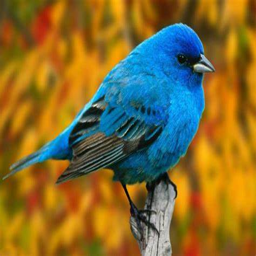

fp32 Model Results:
 a blue bird perched on a branch in front of a colorful fall tree
bf16 Model Results:
 a blue bird sitting on top of a wooden post




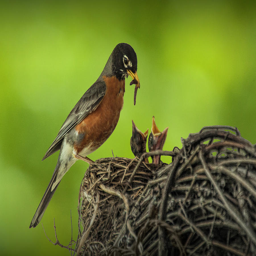

fp32 Model Results:
 a bird is feeding a baby bird in its nest
bf16 Model Results:
 a bird is feeding a baby bird in its nest




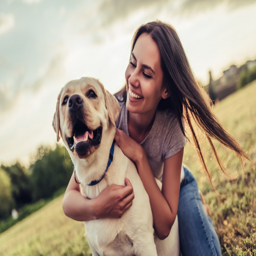

fp32 Model Results:
 a woman is holding her dog in the park
bf16 Model Results:
 a woman is holding her dog in the park




In [61]:
for im in img:
  image=load_image(im)
  display(image.resize((256,256)))

  results_fp32 = get_generation(model,
                              processor,
                              image,
                              torch.float32)
  print("fp32 Model Results:\n", results_fp32)

  results_bf16 = get_generation(model_bf16,
                              processor,
                              image,
                              torch.bfloat16)
  print("bf16 Model Results:\n", results_bf16)
  print("\n")


In [47]:
# Save the quantaized model
torch.save(model_bf16.state_dict(), "blip_bf16.pth")


In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [52]:
# Load the model
model_bf16 = BlipForConditionalGeneration.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16
)
model_bf16.load_state_dict(torch.load("blip_bf16.pth"))

<All keys matched successfully>

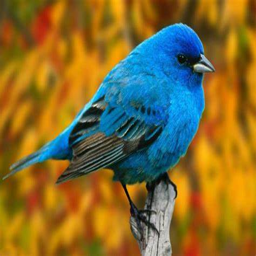

bf16 Model Results:
 a blue bird sitting on top of a wooden post


In [53]:
image=load_image(img_url1)
display(image.resize((256,256)))

results_bf16 = get_generation(model_bf16,
                              processor,
                              image,
                              torch.bfloat16)
print("bf16 Model Results:\n", results_bf16)